# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_hh_income.shape,df_pct_poverty.shape,df_pct_completed_hs.shape,df_share_race_city.shape,df_fatalities.shape

((29322, 3), (29329, 3), (29329, 3), (29268, 7), (2535, 14))

In [5]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [6]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [7]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [9]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [11]:
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [12]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [13]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [14]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [15]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [16]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [17]:
df_pct_completed_hs.isna().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [18]:
df_pct_poverty.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [19]:
df_share_race_city.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

***only income and fatalities dataframes have missing values so we will replace them with 0 using `fillna()` function.***

In [20]:
df_fatalities=df_fatalities.fillna(0)

In [21]:
df_hh_income=df_hh_income.fillna(0)

In [22]:
df_fatalities.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [23]:
df_hh_income.isna().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

## Chart the Poverty Rate in each US State
Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate? Bar Plot

In [24]:
df_pct_poverty.poverty_rate.replace('-',0, regex=True, inplace=True)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)
df_pct_poverty=df_pct_poverty.fillna(0)

In [25]:
poverty=df_pct_poverty.groupby(["Geographic Area"])["poverty_rate"].mean()
poverty_sort=poverty.sort_values()

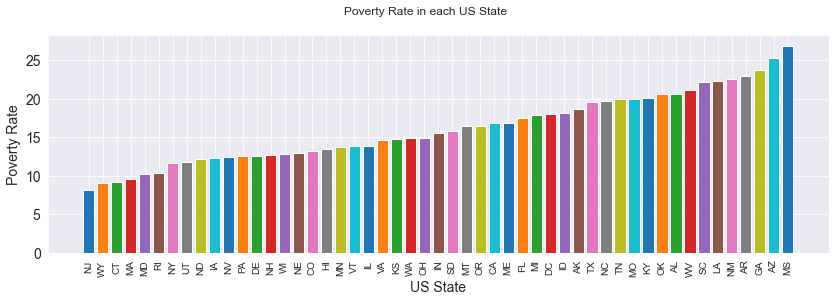

In [26]:
sns.set_style("darkgrid")

plt.figure(figsize=(14,4))
plt.suptitle('Poverty Rate in each US State')
plt.ylabel('Poverty Rate', fontsize=14)
plt.xlabel('US State', fontsize=14)

for n in range(len(poverty)):
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=14)
    plt.bar(poverty_sort.index[n], poverty_sort[n])

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [27]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [28]:
df_pct_completed_hs["percent_completed_hs"].value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [29]:
df_pct_completed_hs["percent_completed_hs"].replace("-",0,regex=True,inplace=True)

In [30]:
df_pct_completed_hs["percent_completed_hs"]=df_pct_completed_hs["percent_completed_hs"].astype(float)

In [31]:
df_pct_completed_hs=df_pct_completed_hs.fillna(0)

In [32]:
Hs_graduation=df_pct_completed_hs.groupby(["Geographic Area"])["percent_completed_hs"].mean()
Hs_graduation_sort=Hs_graduation.sort_values()
Hs_graduation

Geographic Area
AK   80.10
AL   80.16
AR   79.95
AZ   79.22
CA   80.82
CO   88.93
CT   91.59
DC   89.30
DE   88.52
FL   85.46
GA   78.63
HI   91.67
IA   89.67
ID   84.42
IL   88.29
IN   86.32
KS   87.97
KY   82.22
LA   79.12
MA   92.03
MD   88.08
ME   91.43
MI   89.21
MN   89.47
MO   82.79
MS   78.47
MT   89.99
NC   83.14
ND   87.60
NE   89.52
NH   90.71
NJ   90.52
NM   78.97
NV   87.05
NY   90.54
OH   88.20
OK   82.46
OR   87.60
PA   88.97
RI   88.82
SC   80.65
SD   86.18
TN   81.63
TX   74.09
UT   89.64
VA   84.88
VT   89.98
WA   87.07
WI   90.26
WV   82.14
WY   83.97
Name: percent_completed_hs, dtype: float64

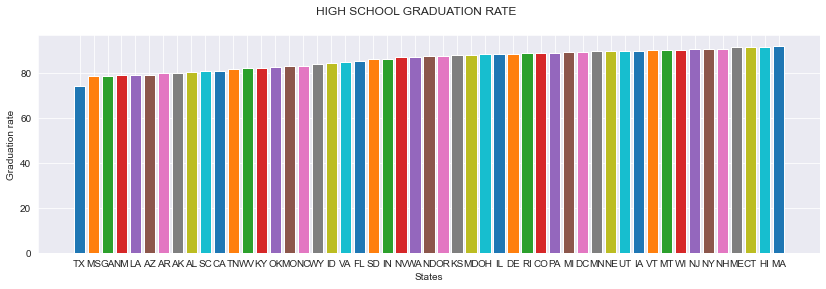

In [33]:
plt.figure(figsize=(14,4))
plt.suptitle("HIGH SCHOOL GRADUATION RATE")
plt.xlabel("States")
plt.ylabel("Graduation rate")
for i in range(len(Hs_graduation)):
    plt.bar(Hs_graduation_sort.index[i],Hs_graduation_sort[i])
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

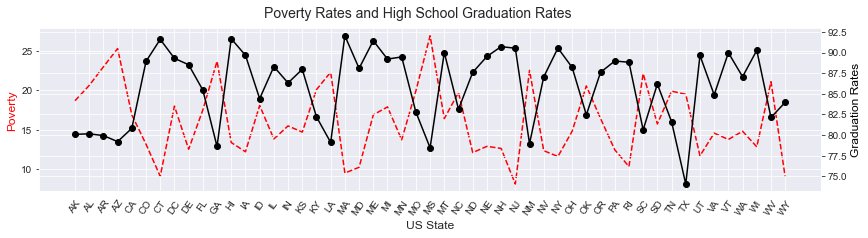

In [34]:
fig,ax1=plt.subplots(figsize=(14,3))
plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)
ax1.plot(poverty.index,poverty,color="red",linestyle='--')
ax2=ax1.twinx()
ax2.plot(Hs_graduation.index,Hs_graduation,color="black",marker="o")
ax1.set_ylabel("Poverty",color="Red",fontsize=12)
ax2.set_ylabel("Graduation Rates",color="Black",fontsize=12)
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [35]:
merged_dict={"poverty rates":poverty.values,
            "High school graduation_rate":Hs_graduation.values}
merged_dict
merged_df=pd.DataFrame(merged_dict)

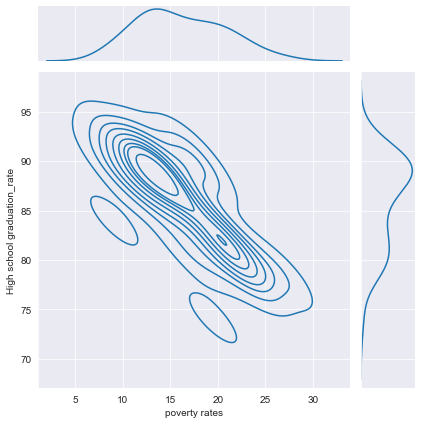

In [36]:
sns.jointplot(x=merged_df["poverty rates"],y=merged_df["High school graduation_rate"],kind="kde");

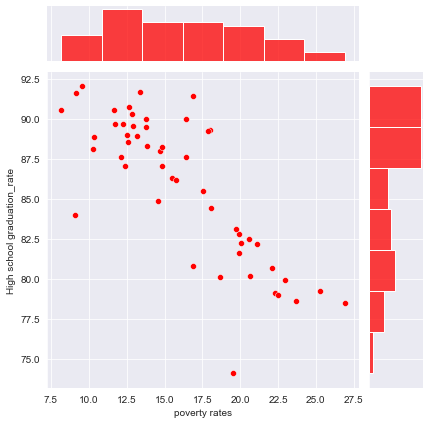

In [37]:
sns.jointplot(x=merged_df["poverty rates"],y=merged_df["High school graduation_rate"],kind="scatter",color="red");

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

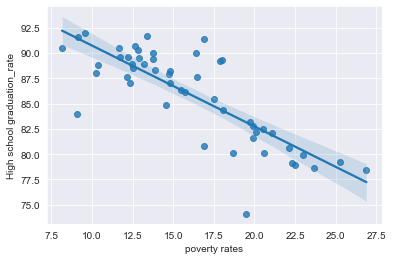

In [38]:
sns.regplot(x=merged_df["poverty rates"],y=merged_df["High school graduation_rate"]);

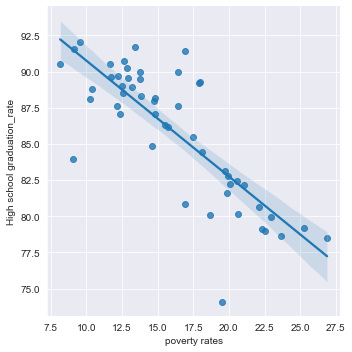

In [39]:
sns.lmplot(x="poverty rates",y="High school graduation_rate",data=merged_df);

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [40]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [41]:
cols=["share_white","share_black","share_native_american","share_asian","share_hispanic"]
df_share_race_city[cols]=df_share_race_city[cols].apply(pd.to_numeric,errors="coerce",axis=1)
racial=df_share_race_city.groupby(["Geographic area"]).agg({"share_white":"mean","share_black":"mean","share_native_american":"mean","share_asian":"mean","share_hispanic":"mean"})

In [42]:
racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


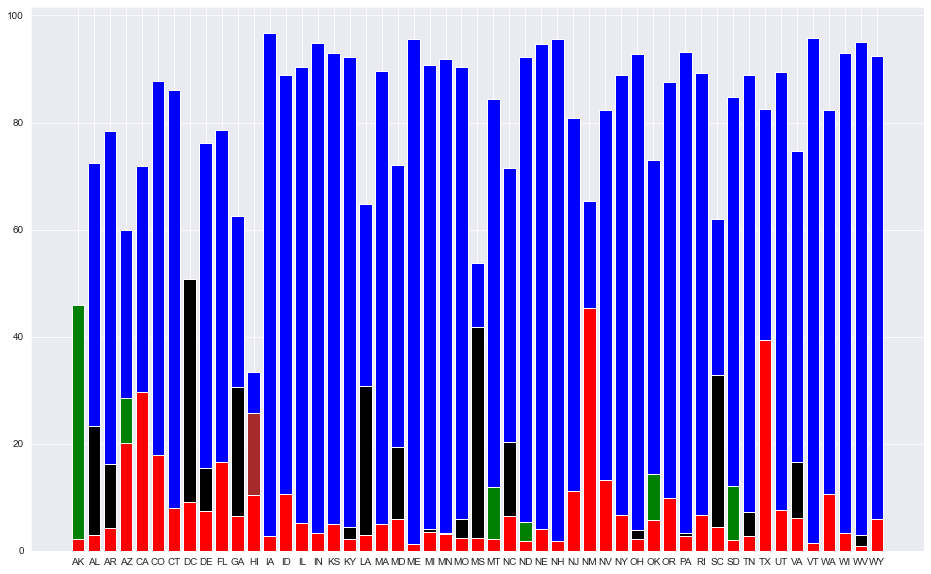

In [43]:
fig,ax=plt.subplots(figsize=(16,10))
for i in range(len(racial)):
    ax.bar(racial.index[i],racial["share_white"][i],color="blue")
    ax.bar(racial.index[i],racial["share_black"][i],color="black")
    ax.bar(racial.index[i],racial["share_native_american"][i],color="green")
    ax.bar(racial.index[i],racial["share_asian"][i],color="brown")
    ax.bar(racial.index[i],racial["share_hispanic"][i],color="red")
plt.show()

## Create a donut Chart By of people killed by race.

In [44]:
killed=df_fatalities.race.value_counts()
val=sum(killed.values)
val

2535

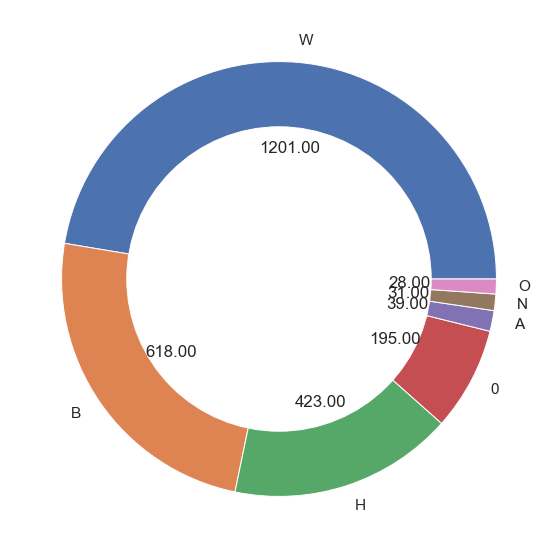

In [45]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,10))
plt.pie(killed,labels=killed.index,autopct=lambda p:'{:.2f}'.format(p*(val/100)))
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

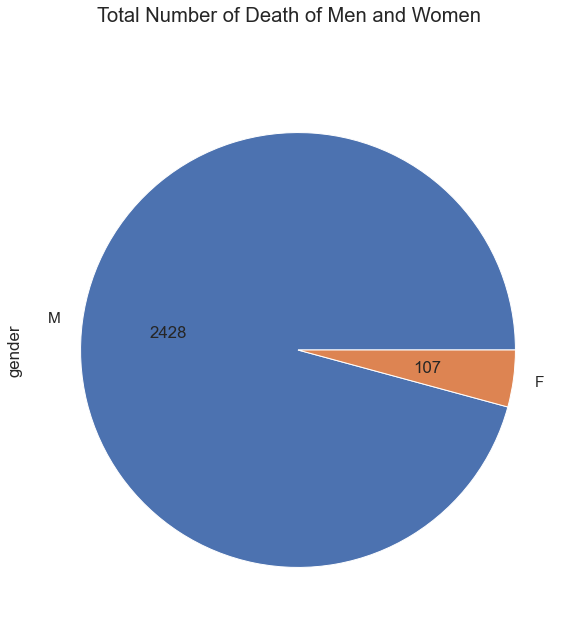

In [46]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,10))
total=sum(df_fatalities.gender.value_counts().values)
df_fatalities.gender.value_counts().plot(kind="pie",autopct=lambda p:"{:.0f}".format(p*total/100))
plt.suptitle("Total Number of Death of Men and Women")
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [47]:
death_age=df_fatalities[["gender","age","manner_of_death"]]
death_age.head()

,gender,age,manner_of_death
0,M,53.00,shot
1,M,47.00,shot
2,M,23.00,shot and Tasered
3,M,32.00,shot
4,M,39.00,shot


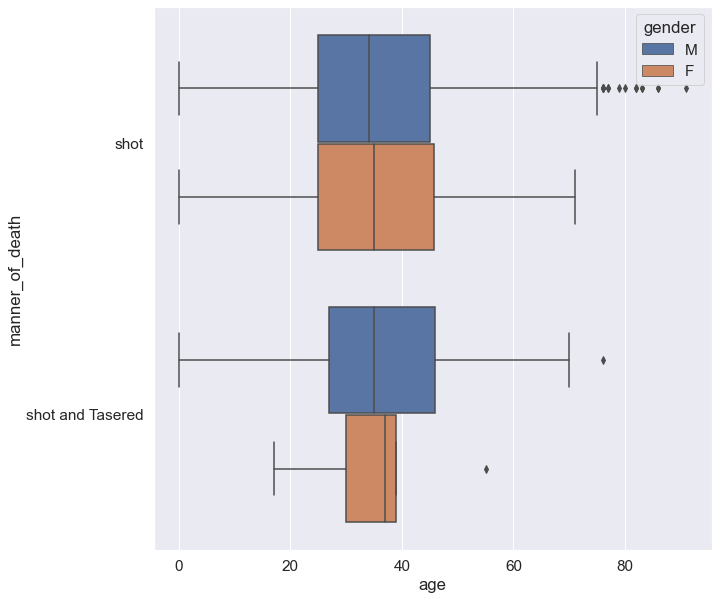

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(x="age",y="manner_of_death",data=death_age,hue="gender")
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [49]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [50]:
copy=df_fatalities.copy()

In [51]:
copy.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', 0,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and

In [52]:
weapons=['gun', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', 0,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and knife',
       'baseball bat and bottle', 'fireworks', 'pen']
copy.armed=copy.armed.replace(weapons,"armed")

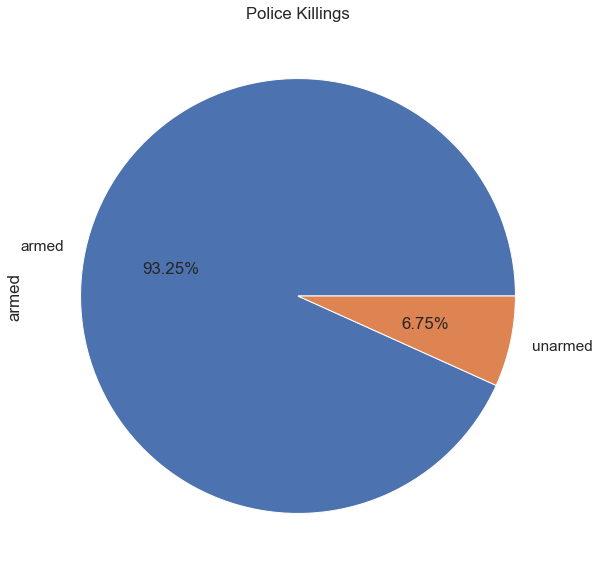

In [53]:
plt.figure(figsize=(10,10))
total=sum(copy.armed.value_counts())
copy.armed.value_counts().plot(kind="pie",autopct=lambda p:"{:.2f}%".format(p*total/total),title="Police Killings")
plt.show()

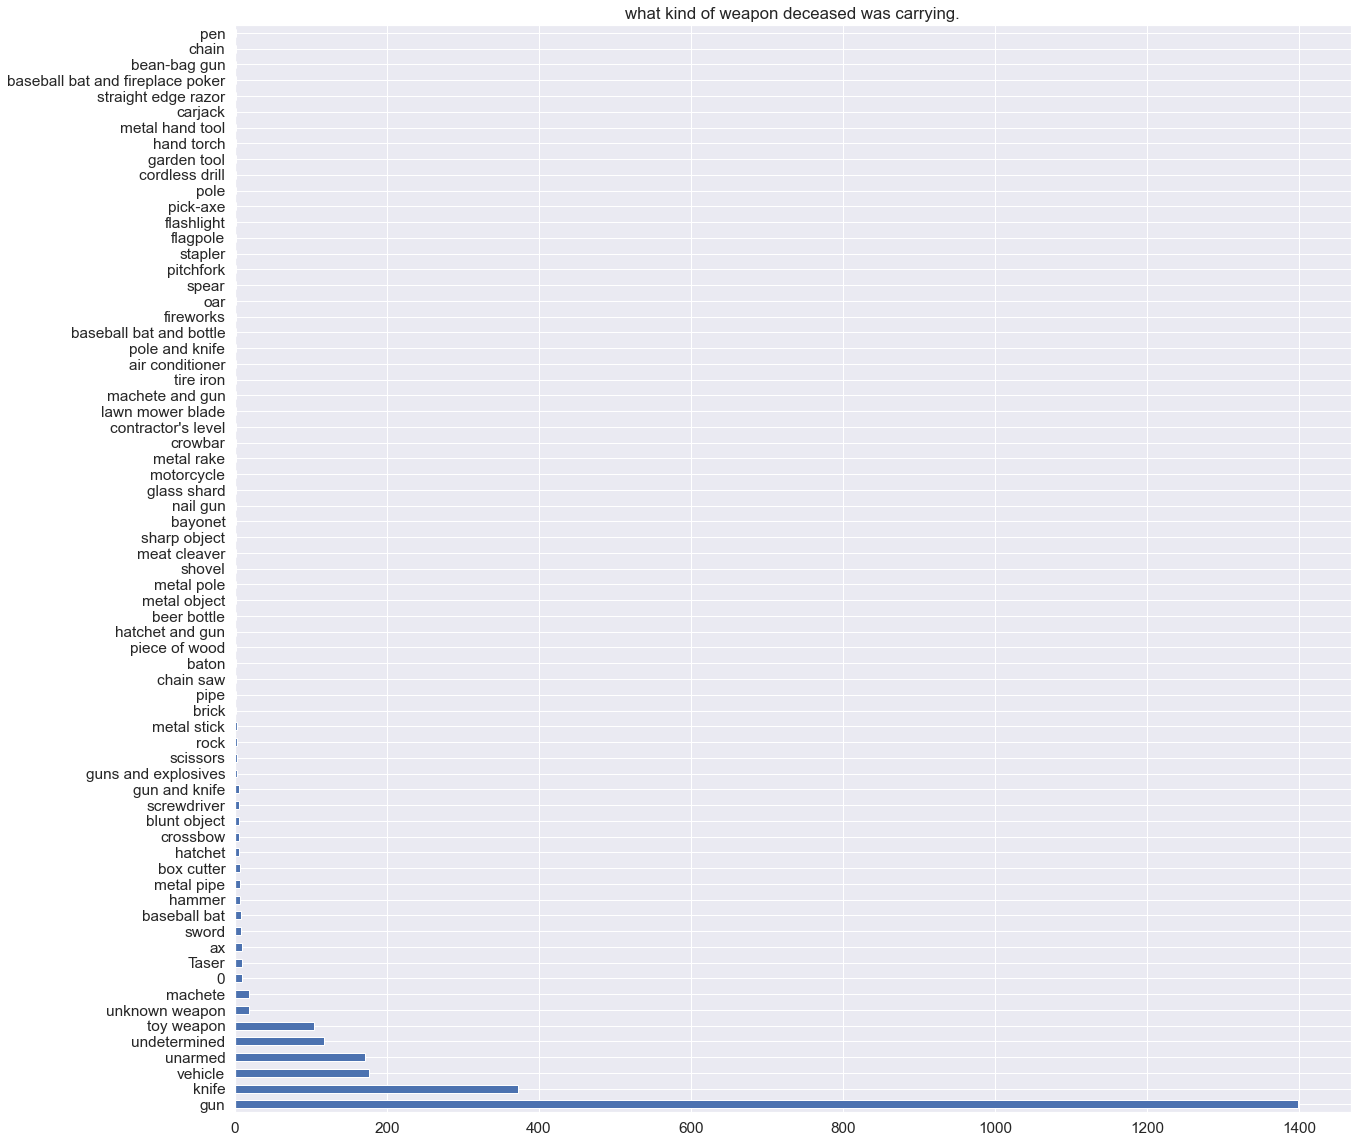

In [54]:
plt.figure(figsize=(20,20))
df_fatalities["armed"].value_counts().plot(kind="barh",title="what kind of weapon deceased was carrying.")
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [55]:
under_25=df_fatalities["age"][df_fatalities["age"]<25]
print(f"the percentage of the people killed less than 25 years old of all peoples is {round((len(under_25)/len(df_fatalities.age)*100),2)}%.")

the percentage of the people killed less than 25 years old of all peoples is 20.79%.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

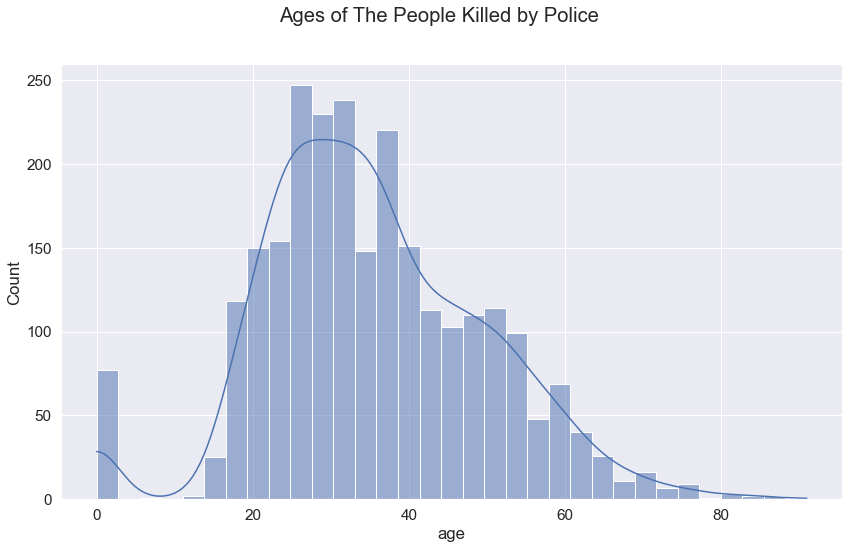

In [56]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

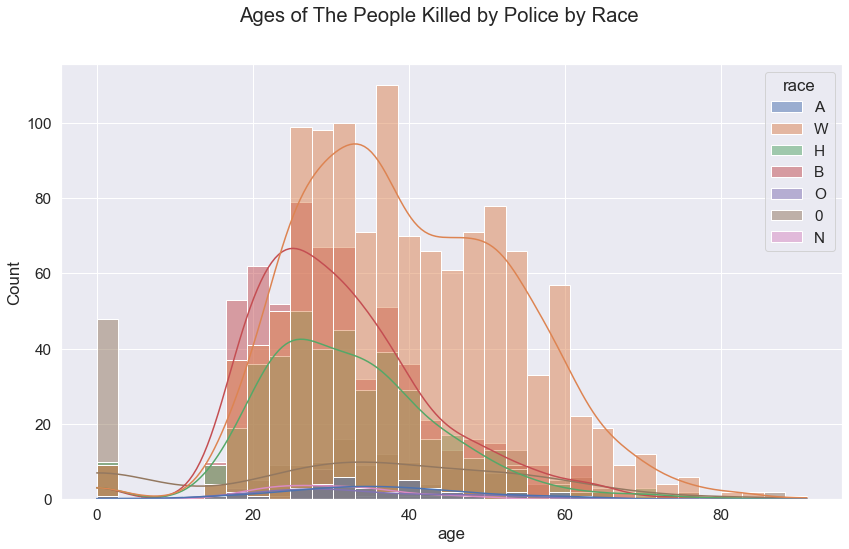

In [57]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police by Race')
sns.histplot(data=df_fatalities, x="age", kde=True, hue='race')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [58]:
mental_illness=df_fatalities.signs_of_mental_illness[df_fatalities.signs_of_mental_illness==True]
print(f"the percentage of the people killed by police with mental illness {round((len(mental_illness)/len(df_fatalities.signs_of_mental_illness)*100),2)}%.")

the percentage of the people killed by police with mental illness 24.97%.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

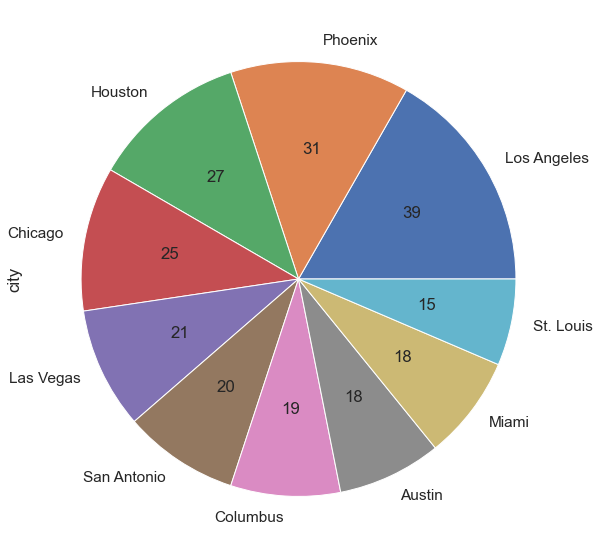

In [59]:
plt.figure(figsize=(10,10))
cities=df_fatalities.city.value_counts().head(10)
px=sum(cities.values)
cities.plot(kind="pie",autopct=lambda p:"{:.0f}".format(p*px/100))
plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [60]:
monthly_killings=df_fatalities.copy()

In [61]:
monthly_killings.date=pd.to_datetime(monthly_killings.date)
monthly_killings["killing_month"]=monthly_killings.date.dt.to_period("m")
monthly_killings["killing_month"]=monthly_killings["killing_month"].astype(str)

In [62]:
monthly_killings.killing_month.value_counts()

2015-09    90
2016-06    90
2016-03    89
2015-10    89
2015-04    88
2015-03    87
2015-08    86
2015-05    85
2015-07    85
2015-12    85
2016-01    85
2016-11    84
2016-05    82
2015-11    80
2016-02    79
2016-08    79
2016-07    78
2015-02    78
2016-10    77
2016-04    75
2017-01    75
2016-12    74
2017-03    74
2017-07    71
2016-09    71
2015-01    70
2017-04    70
2017-02    69
2015-06    68
2017-06    63
2017-05    61
2017-09    23
2017-10    21
2017-12    20
2017-08    18
2017-11    16
Name: killing_month, dtype: int64

In [63]:
history=monthly_killings.groupby(["killing_month"]).size()
history

killing_month
2015-01    70
2015-02    78
2015-03    87
2015-04    88
2015-05    85
2015-06    68
2015-07    85
2015-08    86
2015-09    90
2015-10    89
2015-11    80
2015-12    85
2016-01    85
2016-02    79
2016-03    89
2016-04    75
2016-05    82
2016-06    90
2016-07    78
2016-08    79
2016-09    71
2016-10    77
2016-11    84
2016-12    74
2017-01    75
2017-02    69
2017-03    74
2017-04    70
2017-05    61
2017-06    63
2017-07    71
2017-08    18
2017-09    23
2017-10    21
2017-11    16
2017-12    20
dtype: int64

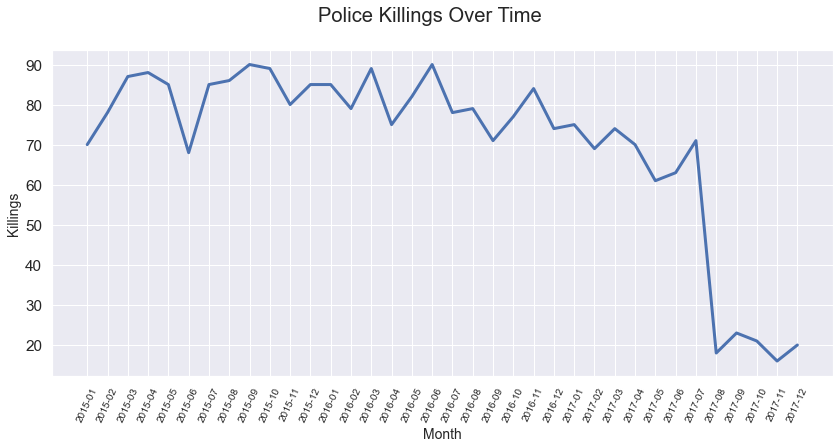

In [64]:
plt.figure(figsize=(14,6))
plt.plot(history.index, history, linewidth=3)
plt.xticks(ticks=history.index, fontsize=10, rotation=65)
plt.suptitle('Police Killings Over Time')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Killings', fontsize=14)

plt.show()